In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#### importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import math
import os 
import tensorflow as tf
import cv2
import imghdr
from keras import optimizers

In [2]:
### Choosing our datasets from the data folder
#### Reducing the image size to 128x128 pixels

data = tf.keras.utils.image_dataset_from_directory('data',image_size =(128,128),seed=42)

Found 2269 files belonging to 2 classes.


In [241]:
data_iterator = data.as_numpy_iterator()

In [242]:
### Creating batches of our dataset

batch = data_iterator.next()

In [243]:
### Checking the shape of our first batch
batch[0].shape

(32, 128, 128, 3)

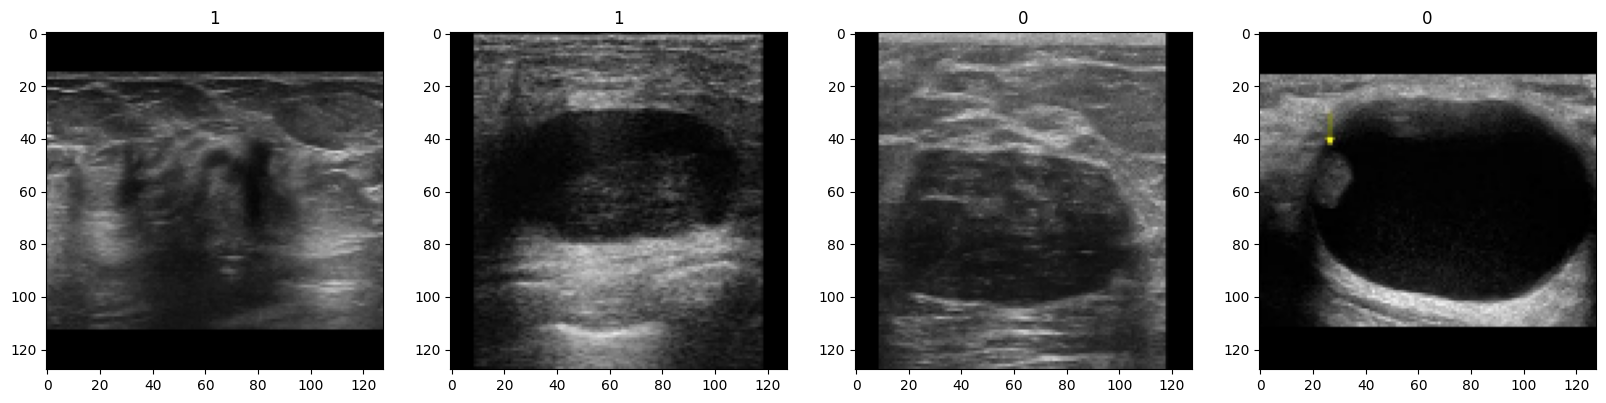

In [244]:
#### PLOTTING FIRST FOUR OF OUR IMAGES WITH THEIR LABELS

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])



# **Scaling** **Data**

In [245]:
#### Scaling our image data by dividing by the highest pixel value in an image(255)
#### This is for better model performance and to reduce overfitting

data = data.map(lambda x,y: (x/255, y))

In [246]:
batch[0][0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

**Split Data**

In [247]:
##### Splitting each batch into 80% train, 10% test and 10% validate

train_size = int(len(data)*.8)
val_size = int(len(data)*.1)
test_size = int(len(data)*.1)



In [248]:
print(train_size)
print(test_size)
print(val_size)

56
7
7


In [249]:
##### Taking the appropriate amount of images as train, validate and test as calculated above

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


# **Building the deep learning model**

In [251]:
### impport necessary libraries for our CNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [252]:
#### Creating an instance of our Neural Network

model = Sequential()

In [253]:
### Build the various layers of our network

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(128,128,3)))
#### Include dropouts to help reduce overfitting
model.add(Dropout(0.5))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
#### Include dropouts to help reduce overfitting
model.add(Dropout(0.4))

model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# NB

### Class 0 is to Benign 

### Class 1 is to Malignant

In [254]:
### Compiling our model with the adam optimizer

optm = optimizers.Adam()

model.compile(optimizer = optm, loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [256]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 dropout_28 (Dropout)        (None, 126, 126, 16)      0         
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 63, 63, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 dropout_29 (Dropout)        (None, 61, 61, 32)        0         
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                

# **Training our Neural Network**

In [257]:
logdir='logs'

In [258]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [259]:
### Early Stopping

#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='auto', patience=3,verbose = 1,start_from_epoch = 21)

In [260]:
##### Building our model

hist = model.fit(train,epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
56/56 [==============================] - 29s 483ms/step - loss: 0.6907 - accuracy: 0.5592 - val_loss: 0.6751 - val_accuracy: 0.6339
Epoch 2/20
56/56 [==============================] - 29s 492ms/step - loss: 0.6548 - accuracy: 0.6105 - val_loss: 0.6600 - val_accuracy: 0.6696
Epoch 3/20
56/56 [==============================] - 29s 495ms/step - loss: 0.6211 - accuracy: 0.6523 - val_loss: 0.6242 - val_accuracy: 0.6562
Epoch 4/20
56/56 [==============================] - 29s 483ms/step - loss: 0.5954 - accuracy: 0.6908 - val_loss: 0.6408 - val_accuracy: 0.6607
Epoch 5/20
56/56 [==============================] - 35s 590ms/step - loss: 0.5733 - accuracy: 0.6987 - val_loss: 0.5972 - val_accuracy: 0.6696
Epoch 6/20
56/56 [==============================] - 35s 579ms/step - loss: 0.5490 - accuracy: 0.7227 - val_loss: 0.6131 - val_accuracy: 0.6741
Epoch 7/20
56/56 [==============================] - 29s 491ms/step - loss: 0.5063 - accuracy: 0.7545 - val_loss: 0.5903 - val_accuracy: 0.6473

**Plot Performance**

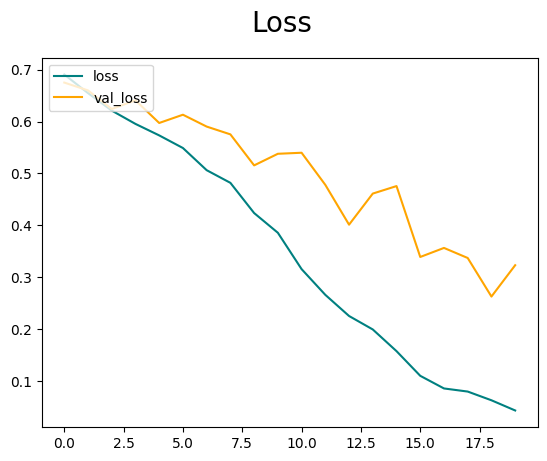

In [261]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.xlabel('No. of Epochs')
plt.ylabel('Model Loss')

plt.show()


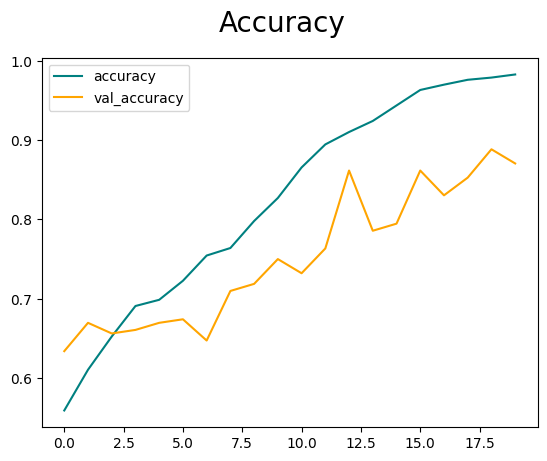

In [263]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.xlabel('No. of Epochs')
plt.ylabel('Model Accuracy')

plt.show()



In [264]:
hist.history

{'loss': [0.6906776428222656,
  0.6547974944114685,
  0.6211106181144714,
  0.5954322218894958,
  0.5732898712158203,
  0.5489663481712341,
  0.5062529444694519,
  0.48185044527053833,
  0.42365410923957825,
  0.38565686345100403,
  0.3156031668186188,
  0.26602283120155334,
  0.22528432309627533,
  0.19931049644947052,
  0.15752767026424408,
  0.11000388115644455,
  0.08565199375152588,
  0.07965676486492157,
  0.06285473704338074,
  0.043208710849285126],
 'accuracy': [0.5591517686843872,
  0.6104910969734192,
  0.65234375,
  0.6908482313156128,
  0.6986607313156128,
  0.72265625,
  0.7544642686843872,
  0.7639508843421936,
  0.7979910969734192,
  0.8270089030265808,
  0.8655133843421936,
  0.89453125,
  0.91015625,
  0.9241071343421936,
  0.9436383843421936,
  0.9631696343421936,
  0.9698660969734192,
  0.9760044813156128,
  0.9787946343421936,
  0.9827008843421936],
 'val_loss': [0.6750658750534058,
  0.6599913835525513,
  0.6241762042045593,
  0.6408211588859558,
  0.5972163081169

**Evaluation**

In [284]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy



In [285]:
### Creating instances of our Precision , Recall and Accuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [286]:
#### Testing our model with the test data

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)


1/1 [==============================] - 0s 22ms/step


In [287]:
print('Precision : ', pre.result().numpy())

print('Recall : ', re.result().numpy())

print('Accuracy : ', acc.result().numpy())


Precision :  0.8492063
Recall :  0.8425197
Accuracy :  0.82589287


In [288]:
f1_score = 2 * (pre.result() * re.result()) / (pre.result() + re.result())

In [289]:
f1_score

<tf.Tensor: shape=(), dtype=float32, numpy=0.8458498>

## Our Model Summary ##


- The Model is a convolutional neural network (CNN) architecture that has three convolutional layers.


- It takes input images with dimensions of 128x128 pixels.


- The Convolutional layers have 16, 32, and 16 filters respectively, followed by max-pooling layers.


- Dropout layers are applied after each convolutional layer to reduce overfitting.


- The output of the last max-pooling layer is then flattened and passed through two dense (fully connected) 
layers with 128 and 1 neurons respectively.  


- It outputs a single value which is either a 0 or 1 signifying Benign or Malignant respectively.


- The model was trained over 20 epochs with 411,377 parameters



# **RESULTS**

- The model's Precision is about 84% : Meaning when our model predicts an image as Malignant, it is correct around 84% of the time.


- The model's Recall is around 84% : Giving us an idea of how accurately our model was able to identify relevant data



- The model's Accuracy is about 82% : Meaning 82% of predictions made by this
model is correct.


- The F1_Score is about 84% : Meaning there is a decent performance in terms of both Precision and Recall

In [ ]:

### Load the sample image

## Replace the path with the appropriate image path
path1 = r'C:\Users\user\Downloads\Compressed\Benchmark\Datasets\BUS_Combined\data\0-Benign\71320-Afbeelding6.png'
test_img1 = cv2.imread(path1)

In [ ]:
#### Resizing and plotting image

resize = tf.image.resize(test_img1, (128,128))
plt.imshow(resize.numpy().astype(int))
plt.show()


In [ ]:
#### Predicting our image class

yhat = model.predict(np.expand_dims(resize/255, 0))

#yhat = model.predict(np.expand_dims(resize, 0))
print(yhat)

In [ ]:
### Interpreting the results

if yhat > 0.5:       ##### Probability > 0.5 
    print(f'Malignant image')
    
else:                ##### Probability < 0.5
    print(f'Benign image')